In [ ]:
#  Copyright (c) 2019 5GTANGO, Paderborn University
# ALL RIGHTS RESERVED.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#
# Neither the name of the SONATA-NFV, 5GTANGO, Paderborn University
# nor the names of its contributors may be used to endorse or promote
# products derived from this software without specific prior written
# permission.
#
# This work has also been performed in the framework of the 5GTANGO project,
# funded by the European Commission under Grant number 761493 through
# the Horizon 2020 and 5G-PPP programmes. The authors would like to
# acknowledge the contributions of their colleagues of the SONATA
# partner consortium (www.5gtango.eu).

In [22]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# global plotting settings
plt.rcParams.update({'font.size': 14})

In [3]:
results_file = 'times_ns1_ns2_50runs.pkl'
df = pd.read_pickle(results_file)
df.head()

,instantiation,packaging,service,total,uploading
0,3.762881,1.048635,ns1,4.974268,0.162752
1,3.452802,0.801207,ns1,4.416270,0.162261
2,3.722683,0.701120,ns1,4.574893,0.151090
3,3.529324,0.716238,ns1,4.409129,0.163567
4,3.604731,0.711161,ns1,4.474845,0.158953


In [8]:
# get mean times for ns1 and ns2
pkg_avg = [df.loc[df['service'] == 'ns1']['packaging'].mean(), df.loc[df['service'] == 'ns2']['packaging'].mean()]
up_avg = [df.loc[df['service'] == 'ns1']['uploading'].mean(), df.loc[df['service'] == 'ns2']['uploading'].mean()]
inst_avg = [df.loc[df['service'] == 'ns1']['instantiation'].mean(), df.loc[df['service'] == 'ns2']['instantiation'].mean()]

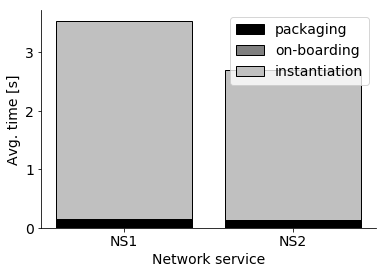

In [28]:
# plot stacked barplots with avg times per service
ns = [0, 1]
times = ['packaging', 'on-boarding', 'instantiation']

plt.bar(ns, pkg_avg, color='black', edgecolor='black')
plt.bar(ns, up_avg, bottom=pkg_avg, color='gray', edgecolor='black')
plt.bar(ns, inst_avg, bottom=up_avg, color='silver', edgecolor='black')

plt.xticks(ns, ['NS1', 'NS2'])
plt.xlabel("Network service")
plt.ylabel("Avg. time [s]")
plt.legend(times)

# remove top and right border of frame
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.savefig('plots/barplot.pdf', bbox_inches='tight')
plt.show()